# Regression Metrics

<hr>

1. MSE $-$ Mean Squared Error $$\text{MSE} = \frac{1}{m} \sum (y - y_{pred}) ^ 2$$

<hr>
    
2. MAE $-$ Mean Absolute Error $$\text{MAE} = \frac{1}{m} \sum |y - y_{pred}|$$

<hr>

3. Median Absolute Error $$\text{Median} = \text{median} \{ |y - y_{pred}| \} $$

<hr>
 
4. R2 $-$ Coefficient of Determination $$\text{R2}\ =\ 1 - \frac{\text{MSE}}{\text{Variance}}\ =\ 1 - \frac{\sum (y - y_{pred}) ^ 2}{\sum (y - \bar{y}) ^ 2}$$

<hr>
 
5. ...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

## Boston property price dataset

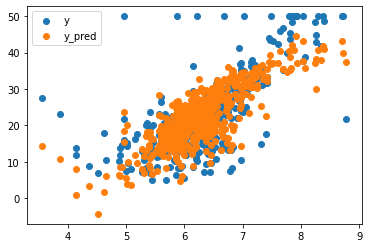

In [2]:
# Boston property price dataset
boston = load_boston()
X = boston.data
y = boston.target

# Create a linear model
model = LinearRegression()

# Training
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Plot
plt.scatter(X[:, 5], y, label="y")
plt.scatter(X[:, 5], y_pred, label="y_pred")
_ = plt.legend()

## Some important metrics

In [3]:
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, median_absolute_error)

# MSE − Mean Squared Error
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:\n", mse)

# MAE − Mean Absolute Error
mae = mean_absolute_error(y, y_pred)
print("\nMean Absolute Error:\n", mae)

# Median Absolute Error
median = median_absolute_error(y, y_pred)
print("\nMedian Absolute Error:\n", median)

Mean Squared Error:
 21.894831181729202

Mean Absolute Error:
 3.270862810900316

Median Absolute Error:
 2.4523106771444656


## Distribution of absolute errors

Remark:
| Our errors follow an exponential distribution law

The number of errors that are greater than 5000 $:  828.5488175251088


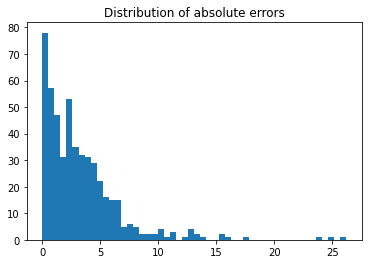

In [4]:
# Histogram (Distribution) of absolute errors
abs_errors = np.abs(y - y_pred)
distribution, errors, _ = plt.hist(abs_errors, bins=50)
plt.title("Distribution of absolute errors")

# Our errors follow an exponential distribution law
print("Remark:\n| Our errors follow an exponential distribution law\n")

# The number of errors that are greater than 5000 $
print("The number of errors that are greater than 5000 $: ", 
      abs_errors[abs_errors>5].sum())

## Coefficient of determination

In [5]:
# Coefficient of determination
coe_det = model.score(X, y)
print("Coefficient of determination: ", coe_det)

# Interpretation the results
percentage = round(coe_det * 100)
print("\nInterpretation the results:\n| "
      f"Our model describes {percentage}% of the real estate price variables")

Coefficient of determination:  0.7406426641094095

Interpretation the results:
| Our model describes 74% of the real estate price variables


## Use metrics in cross-validation

In [6]:
# To use metrics in cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import SCORERS

# List of metrics
list_metrics = sorted(SCORERS.keys())
print("List of metrics: ")
for metric in list_metrics[:4]:
    print("|- ", metric)
print("|   ...")
print("|- ", list_metrics[-1])

# Use `neg_mean_absolute_error` mtric in cross-validation
print("\nUse `neg_mean_absolute_error` mtric in cross-validation:")
val_score = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
print(val_score)

List of metrics: 
|-  accuracy
|-  adjusted_mutual_info_score
|-  adjusted_rand_score
|-  average_precision
|   ...
|-  v_measure_score

Use `neg_mean_absolute_error` mtric in cross-validation:
[-2.62190565 -3.90725478 -4.386606   -5.57073637 -4.76333993]
